In [1]:
import pandas as pd
import numpy as np

from ISLP import load_data
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## Assignment 1: Auto Data
In the first assignment you will analyze the auto data by using classic data exploration as well as
treebased methods as reviewed in class.
The dataset contains information on 392 vehicles. You can review details on the dataset on https://
islp.readthedocs.io/en/latest/datasets/Auto.html. The dataset is comprised of the following columns:


| Spalte | Erklärung | 
| --- | ----------- |
|*mpg*|  miles per gallon | 
| *cylinders* |number of cylinders between 4 and 8| 
| *displacement* |Engine displacement (cubic inches) | 
| *horsepower* |Engine horsepower| 
| *weigt* | Vehicle weight (lbs.|
| *acceleration* | Time to accelerate from 0 to 60 mph (sec.)| 
| *year* | Model year (modulo 100) |
| *origin* | Origin of car (1. American, 2. European, 3. Japanese)|
|*name* | Vehicle name| 


The goal of this exercise is to obtain two models:
1. Model 1 tries to predict the variable mpg with respect to the other available variables.
2. Model 2 tries to predict the origin of a car with respect to the other available variables.



### Guide
Try to answer the following questions with a selection of methods that seems reasonable to you.
The following subsections must be included:

In [2]:
auto = load_data("Auto")


1. Provide an overview over the data with a mixture of plots and statistical indicators. Pay attention
to the scale of each datapoint and create appropriate visualizations that help you understand the
data, in particular the relationship between mpg, origin and other variables. Provide
interpretations and hypotheses for your findings! [5]

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

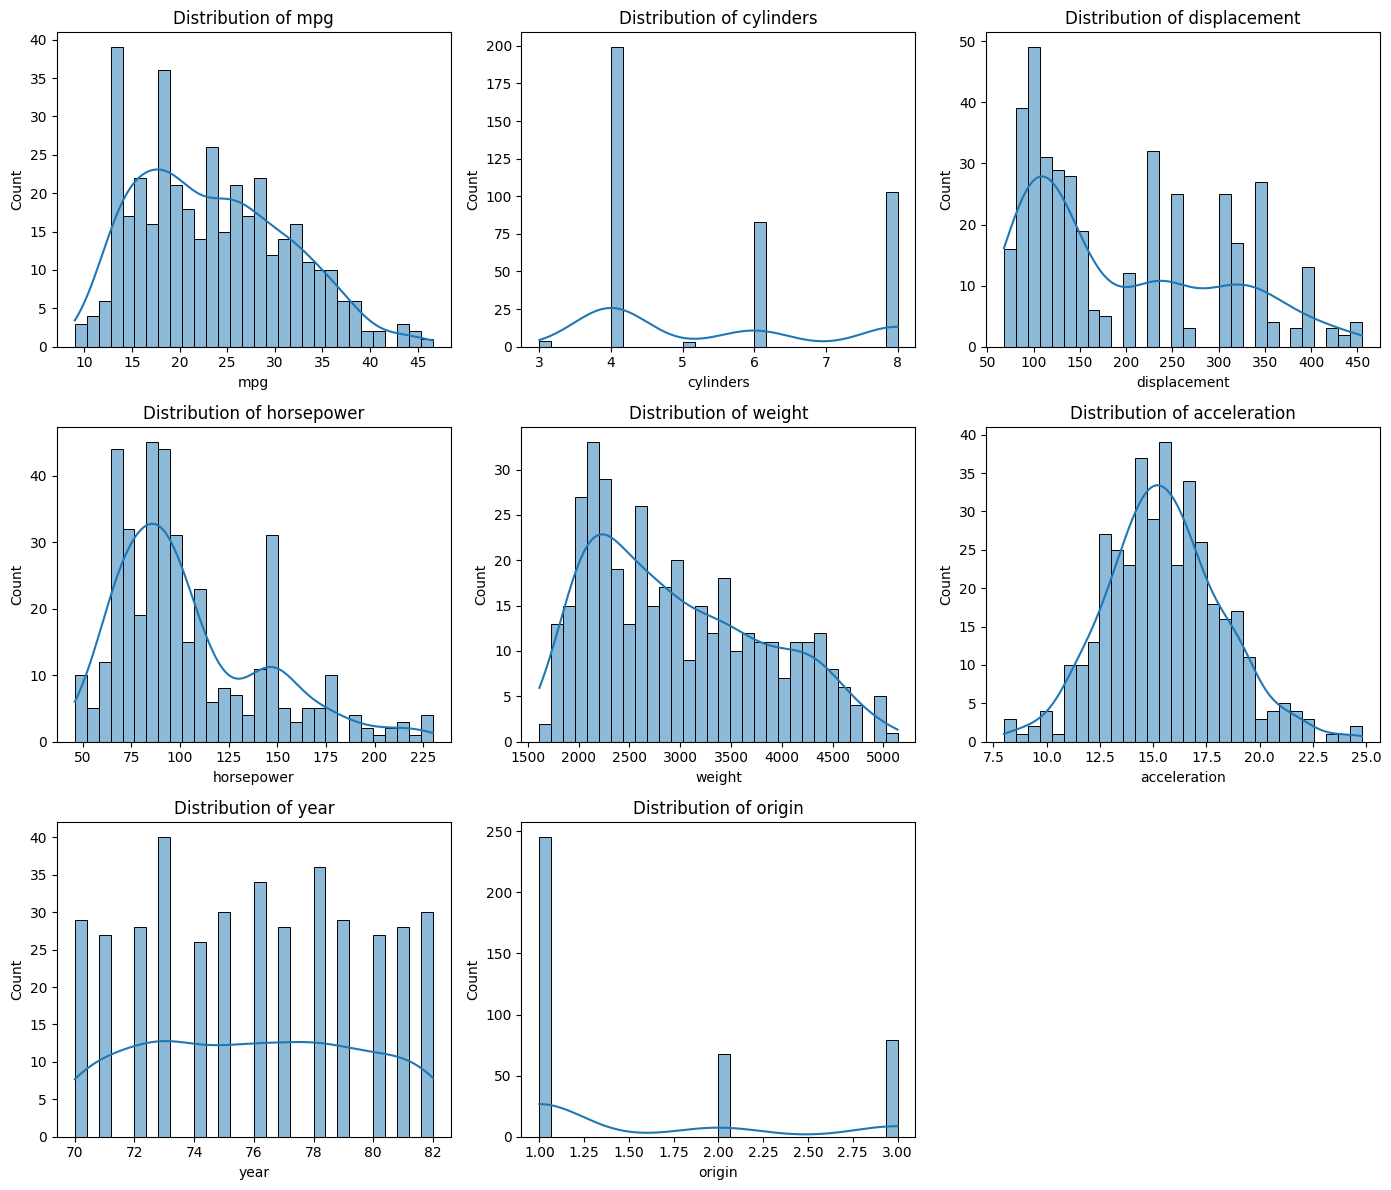

In [7]:
# Get all numerical features
numerical_features = auto.select_dtypes(include=['float64', 'int64']).columns

# Show distributions of numerical features

plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(auto[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

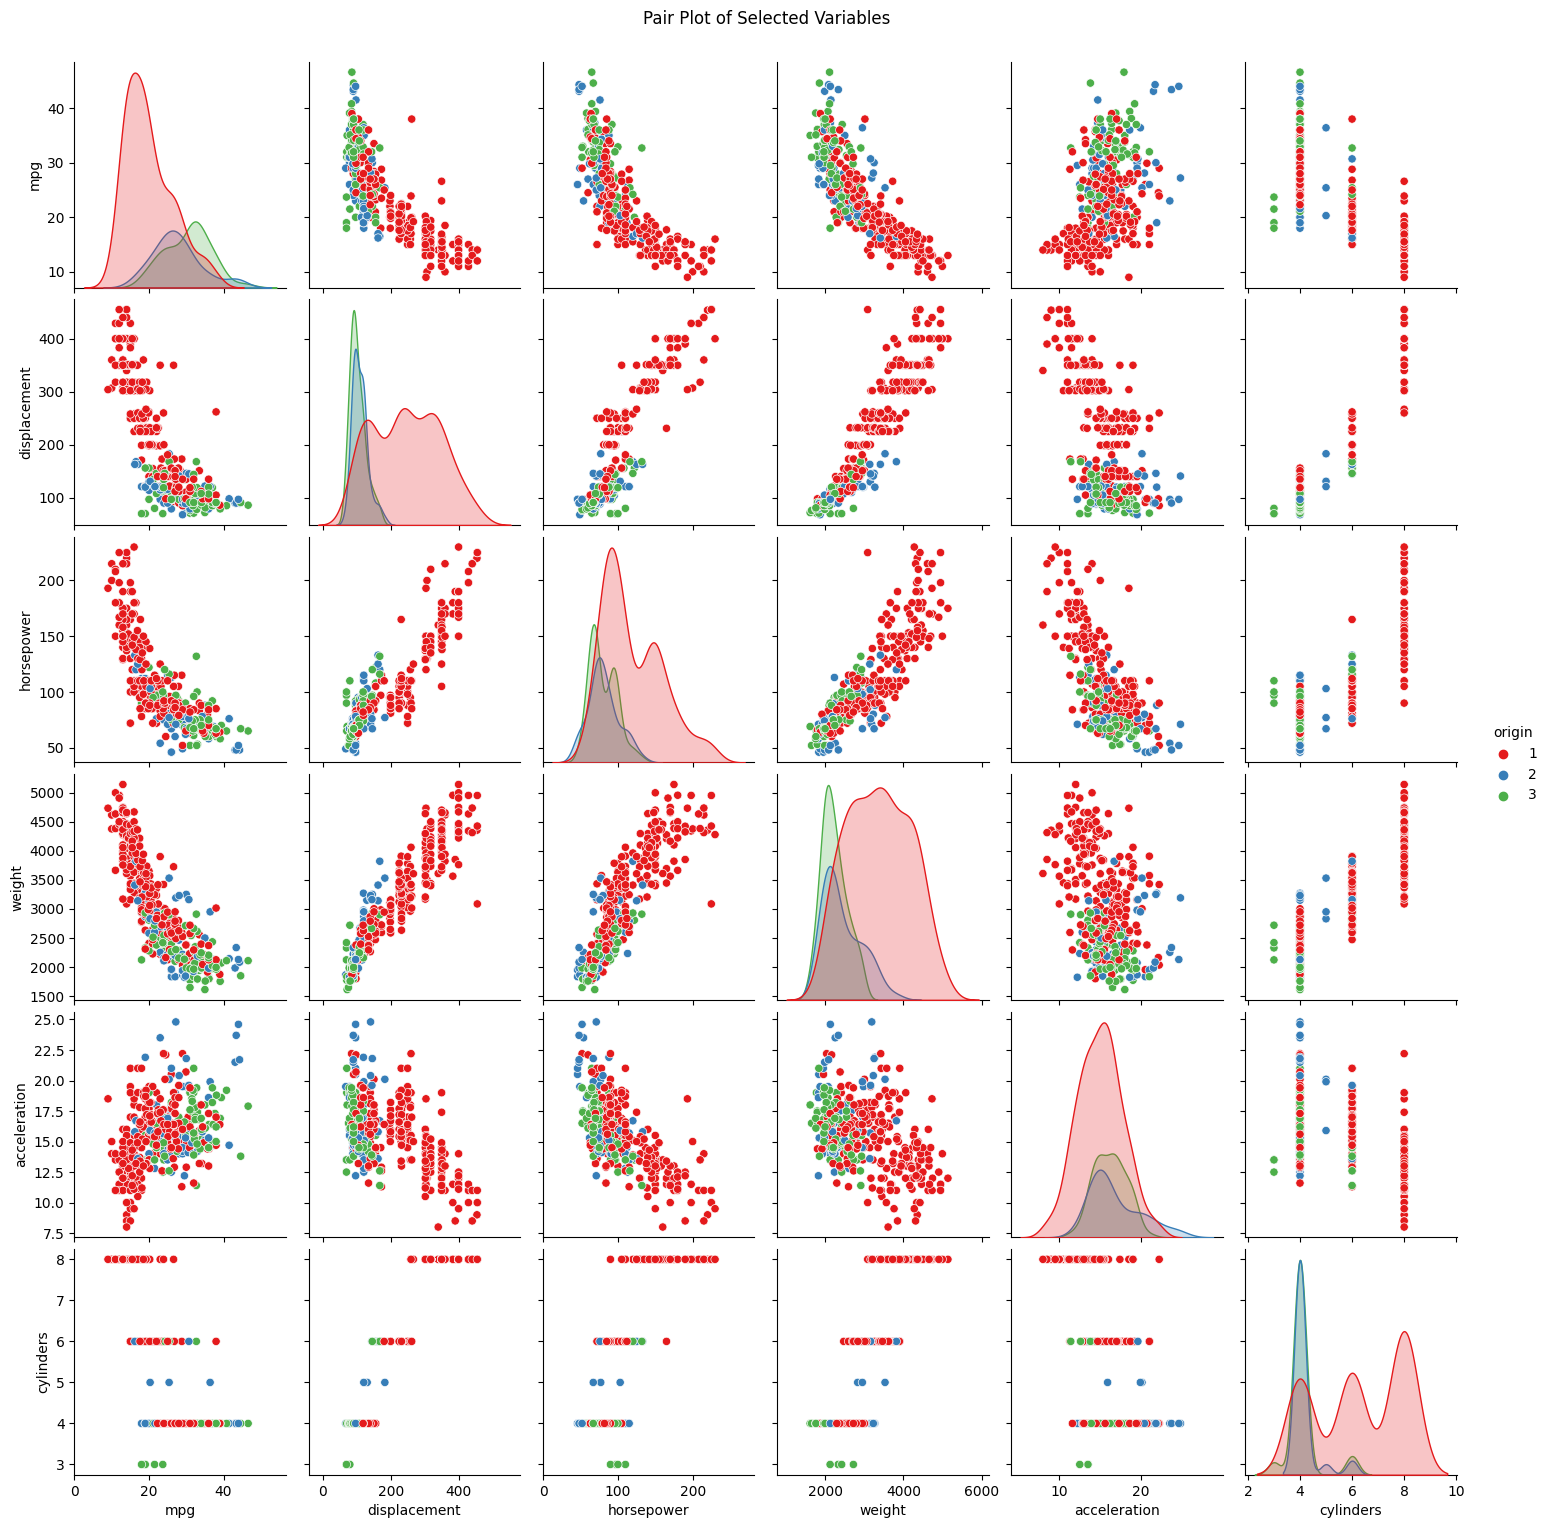

In [8]:
selected_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'origin']
sns.pairplot(auto[selected_vars], hue='origin', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

As the focus on this data exploration is on the value mpg, the following plot displays the correlations between mpg and the other variables, with the hue illustrating the origin of the car. 

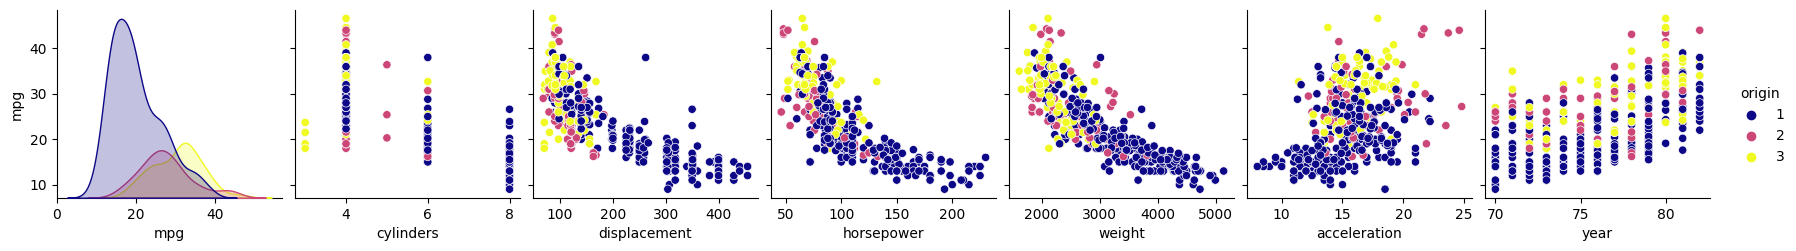

In [9]:
sns.pairplot(auto, y_vars='mpg', hue='origin', palette='plasma')


/tmp/ipykernel_24123/3509958867.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(auto.corr(), annot=True, cmap='coolwarm', center=0)


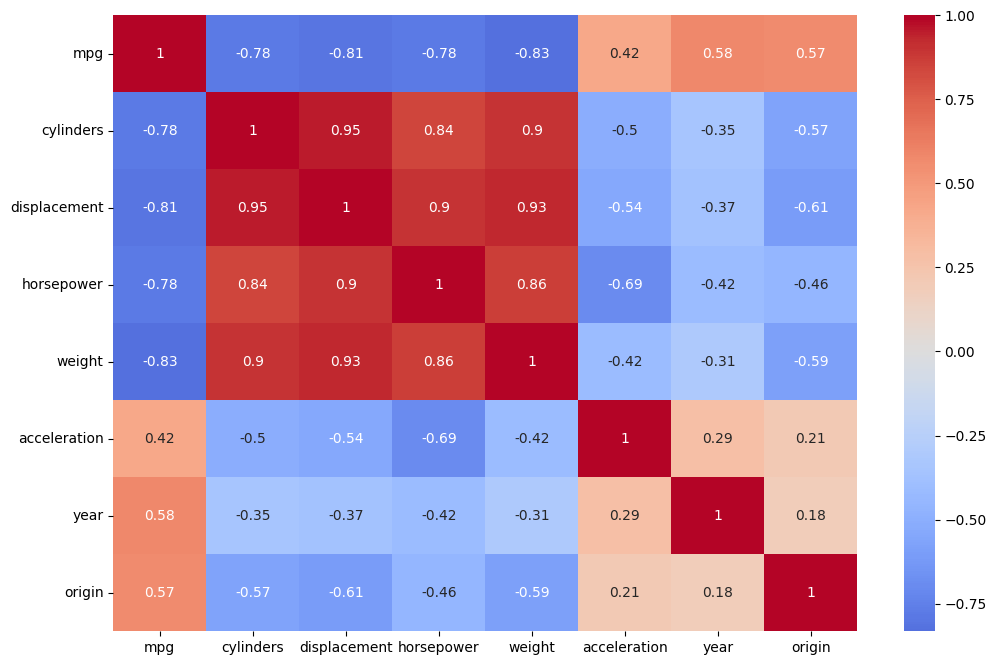

In [10]:
# Analyze correlations between values
plt.figure(figsize=(12, 8))
sns.heatmap(auto.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

In [11]:
auto.select_dtypes(include=np.number).quantile([.1, .25, .5, .75])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0.10,14.00,4.0,90.00,67.0,1990.00,12.000,71.0,1.0
0.25,17.00,4.0,105.00,75.0,2225.25,13.775,73.0,1.0
0.50,22.75,4.0,151.00,93.5,2803.50,15.500,76.0,1.0
0.75,29.00,8.0,275.75,126.0,3614.75,17.025,79.0,2.0


In [12]:
# Looking for values 
#   - close to 1 indicating a strong positive linear relationship, 
#   - close to -1 indicating a strong negative linear relationship
#   - close to 0 indicating a weak liner relationship

# Close relationships seem to be in the upper left quarter of the matrix.

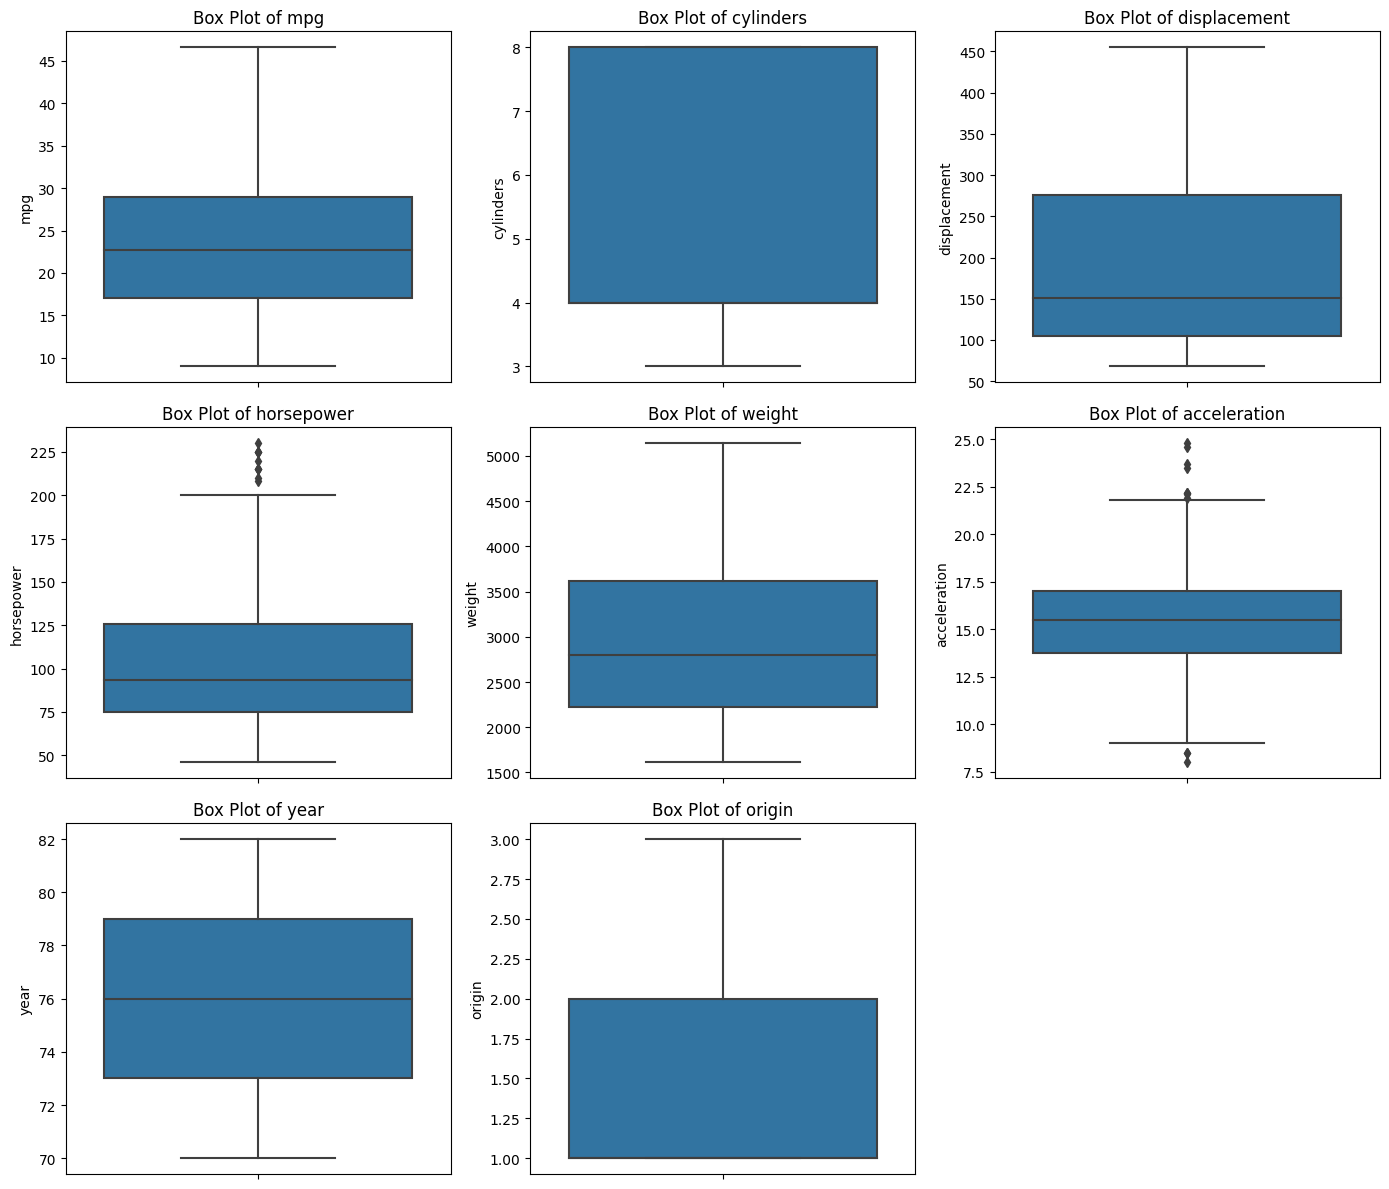

In [13]:

plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=auto[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

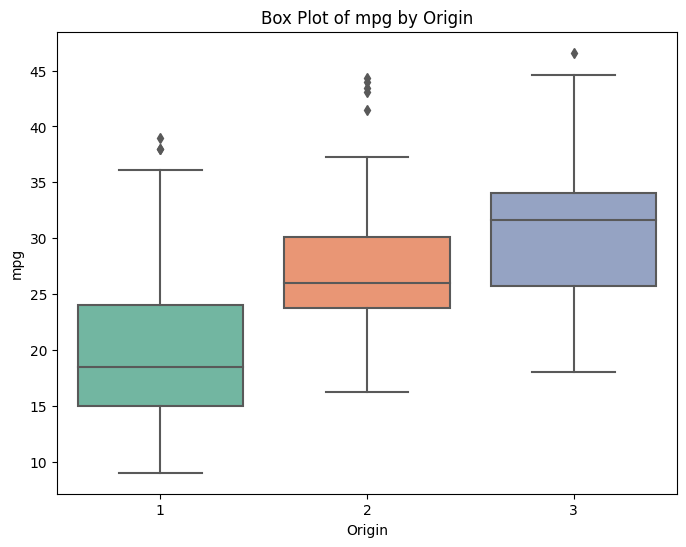

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=auto, palette='Set2')
plt.title('Box Plot of mpg by Origin')
plt.xlabel('Origin')
plt.ylabel('mpg')
plt.show()

## Part 2 

Provide a treebased model to describe mpg. Think about how to include every predictor variable
properly. Fit at least one Decisiontree and at least one Ensemble method, keeping overfitting in
mind. Take care to describe and investigate your model results carefully. Why and how did you
choose these particular model parameters? Which method provides the best predictions? Which
features are most relevant? Are there outliers which aren’t modelled properly? Provide some
visualizations for your model results! [5]

In [15]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [16]:
# Remove name as it is a string column
if 'name' in auto.columns:
    auto.drop('name', axis=1, inplace=True)
    
# Convert origin as a category
if 'origin' in auto.columns:
    auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)

# Remove mpg from dataset as it is the target, and move the target to y
X = auto.drop(columns=['mpg'])
y = auto['mpg']

if 'origin' in auto.columns:
    auto = pd.get_dummies(auto, columns=['origin'], drop_first=True)
# Split the data into training and testing sets    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [17]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


### Decision Tree
We create a first decision tree and fit it, without paramater tuning. 

In [18]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)



DecisionTreeRegressor()

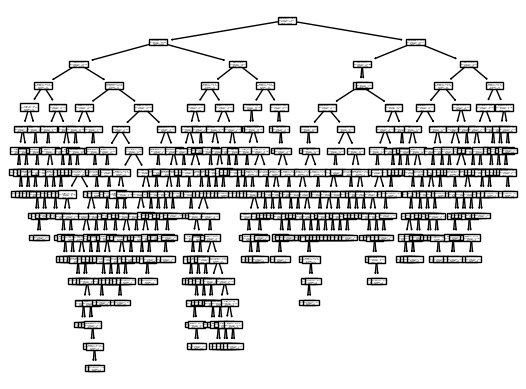

In [19]:
fig, ax = plt.subplots()
plot_tree(tree_model, feature_names=X_train.columns, ax=ax)
plt.show()

In [20]:
y_pred_tree = tree_model.predict(X_test)

print(y_pred_tree)

[23.  19.  31.  30.  27.9 27.  11.  31.5 18.  27.  15.  20.  15.  28.
 17.  27.  18.  32.4 36.4 34.  23.  36.  31.  17.  31.  28.  19.  18.
 27.  23.  16.  20.2 23.  28.  14.  31.   9.  23.  14.  13.  14.  28.
 34.  26.  16.  11.  19.  44.3 23.  30.  14.  21.  21.  37.  38.  16.
 15.5 19.  24.  23.  12.  22.  28.  22.  24.  26.  25.5 30.  23.  14.
 23.  14.  23.8 19.  20.8 24.  13.  18.  24. ]


In [21]:
mse_tree = mean_squared_error(y_test, y_pred_tree)



print(f"Decision Tree MSE: {mse_tree}")


Decision Tree MSE: 11.67506329113924


In [22]:
train_score_tree = tree_model.score(X_train, y_train)
test_score_tree = tree_model.score(X_test, y_test)

print("Decision Tree Training set R^2 score: {:.3f}".format(train_score_tree))
print("Decision Tree Test set R^2 score: {:.3f}".format(test_score_tree))

Decision Tree Training set R^2 score: 1.000
Decision Tree Test set R^2 score: 0.771


As we can see from the training set score of 1.0, this model is very much overfitted. We shall try to change that in the following steps. 

### Parameter tuning

In [23]:
## Create DecisionTree and fit
tree_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=18, max_leaf_nodes=9)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=9, min_samples_leaf=18)

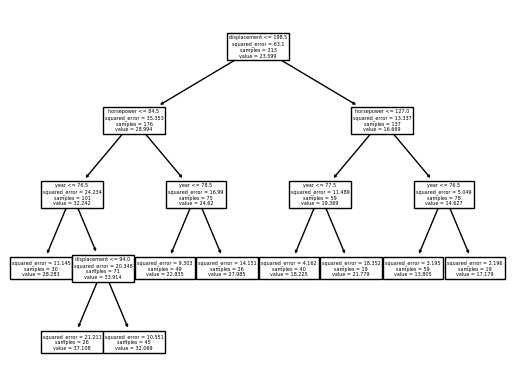

In [24]:
fig, ax = plt.subplots()
plot_tree(tree_model, feature_names=X_train.columns, ax=ax)
plt.show()

In [25]:
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10.532143380826826


In [26]:
print("Trainingset Score R^2 score: {}".format(tree_model.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_model.score(X_test, y_test)))

Trainingset Score R^2 score: 0.8516579516258532
Testset Score R^2 score: 0.7936515863987882


The first efforts in tuning the parameters have improved our overall model - while at first glance the test score for the training set  is worse, this actually is a sign that we no longer have a hopelessly overfitted model. 

The following graphic, showing feature importance, was created with ChatGPT. 

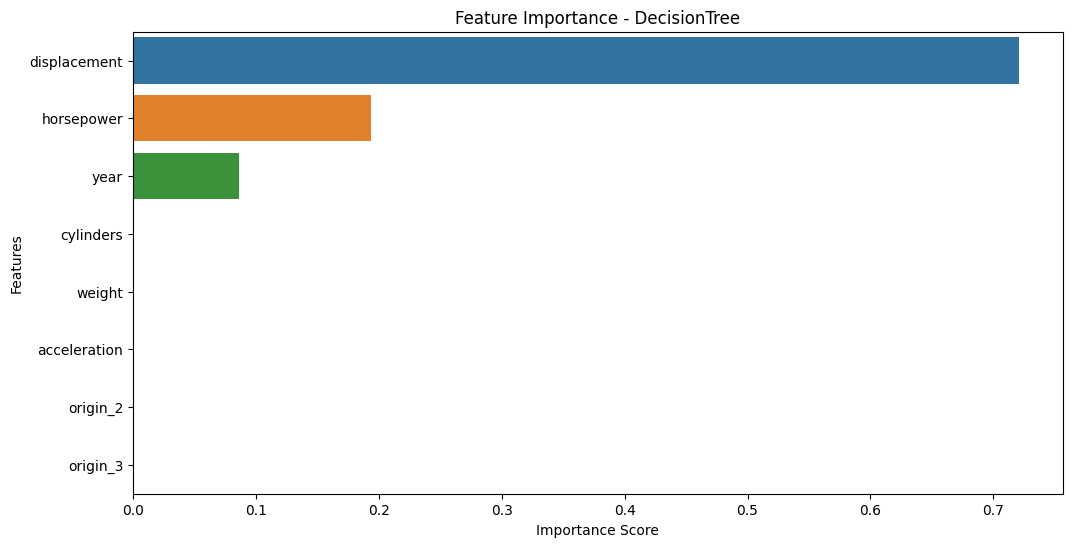

In [27]:
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - DecisionTree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
ccp_path = tree_model.cost_complexity_pruning_path(X, y)

parameter_dictionary = {'ccp_alpha': ccp_path.ccp_alphas[:-1], 'max_depth': range(2, 15), 'min_samples_leaf': range(5, 10), 'max_leaf_nodes': range(2, 15)}

from sklearn.model_selection import GridSearchCV

tree_cv_iterator = GridSearchCV(DecisionTreeRegressor(), parameter_dictionary, n_jobs=4, cv=5)
tree_cv_iterator.fit(X=X, y=y)

cv_tree = tree_cv_iterator.best_estimator_
print(tree_cv_iterator.best_score_, tree_cv_iterator.best_params_)

print("Training Score: {}".format(cv_tree.score(X_train, y_train)))
print("Test Score: {}".format(cv_tree.score(X_test, y_test)))

By automatically tuning the parameters, we have significantly increased the reliability of the model. Another indicator for a well fitted model is the small difference between training and test score. 

### Random Forest Regressor

As random forests usually perform better than single decision trees, we will now fit a model using RandomForestRegressor. 

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
forest_reg.fit(X_train, y_train)

In [ ]:
y_pred_forest = forest_reg.predict(X_test)

In [ ]:
mse_forest = mean_squared_error(y_test, y_pred_forest)


print(f"Random Forest Regressor - Mean Squared Error: {mse_forest}")


In [ ]:
print("Trainingset Score R^2 score: {}".format(forest_reg.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(forest_reg.score(X_test, y_test)))

While the test score of our first model is lower than of our previous one, the MSE improved. 

In [ ]:
feature_importances = pd.Series(forest_reg.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Another difference to the decision tree model is the feature importance. While only displacement, horsepower and year had a significant impact on the decision tree model, for the forest it is only the origin that seems unimportant. 

## Part 3 
Provide a treebased model to classify origin. As above, think about your predictors and how you
want to include them. Fit at least one Decisiontree and at least one Ensemble method, keeping
overfitting in mind. Describe your results carefully and choose your favourite model as in point 2.
Which features are most relevant? Investigate the model results with appropriate measures and
provide visualizations. [5]

In [ ]:
# Reload data
auto = load_data("Auto")

In [ ]:
# Drop the 'name' column as it is not a numeric feature
if 'name' in auto.columns:
    auto.drop('name', axis=1, inplace=True)

# Drop and move origin as it is now the target
X = auto.drop('origin', axis=1)
y = auto['origin']

In [ ]:
# Split the data into training and testing sets
X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

## Decision Tree Classifier
We create a first decision tree, without any parameter tuning. 

In [ ]:
tree_class = DecisionTreeClassifier()
tree_class.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots()
plot_tree(tree_class, feature_names=X_train.columns, ax=ax)
plt.show()

In [ ]:
y_pred_tree_class = tree_class.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_tree_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Trainingset Score R^2 score: {}".format(tree_class.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_class.score(X_test, y_test)))

Once again, our first attempt is, as we can see in the plot of the tree, the training set score and the difference between the test and training score, very overfitted. 

### Parameter tuning for the decision tree classifier

In [ ]:
tree_class = DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, max_leaf_nodes=9)
tree_class.fit(X_train, y_train)

In [ ]:
fig, ax = plt.subplots()
plot_tree(tree_class, feature_names=X_train.columns, ax=ax)
plt.show()

In [ ]:
y_pred_tree_class = tree_class.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_tree_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Trainingset Score R^2 score: {}".format(tree_class.score(X_train, y_train)))
print("Testset Score R^2 score: {}".format(tree_class.score(X_test, y_test)))

In [ ]:
feature_importances = pd.Series(tree_class.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - DecisionTree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In this graphic, we see that the important features for the Decision Tree Classifier Model are displacement, horsepower and weight. 

In [ ]:

parameter_dictionary = {'max_depth': range(2, 15), 'min_samples_leaf': range(5, 10), 'max_leaf_nodes': range(2, 15)}
tree_cv_iterator = GridSearchCV(DecisionTreeClassifier(), parameter_dictionary, n_jobs=4, cv=5)
tree_cv_iterator.fit(X=X, y=y)

cv_tree = tree_cv_iterator.best_estimator_
print(tree_cv_iterator.best_score_, tree_cv_iterator.best_params_)

print("Training Score: {}".format(cv_tree.score(X_train, y_train)))
print("Test Score: {}".format(cv_tree.score(X_test, y_test)))


In [ ]:
y_pred_tree_class = cv_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_tree_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Using the same techniques as earlier (GridSearchCV to find the best parameters), we have improved the model. 
In the confusion matrix we can see, that the model makes less errors the better the parameters were tuned. 

### Random Forest Classifier

As we have seen above, random forests are less error prone, we will therefore use it for our classification of the car origin as well.

First, we fit a simple model, without parameter tuning. 

In [ ]:
forest_class = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest_class.fit(X_train, y_train)

In [ ]:

print("Training Score: {}".format(forest_class.score(X_train, y_train)))
print("Test Score: {}".format(forest_class.score(X_test, y_test)))

In [ ]:
feature_importances = pd.Series(forest_class.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

As with the Random Forest Regressor before, we can see that the Random Forest Classifier also puts more importance on the predictors that were not deemed important by the Decision Tree Classifier. 

This agrees with the findings from the correlation matrix and pairplots from the data exploration phase. 

In [ ]:
y_pred_forest = forest_class.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()